In [1]:
import pandas as pd 
import cv2 
import matplotlib.pyplot as plt 

from keras import Model 
from keras.layers import Input, Conv2D, AveragePooling2D, Dense, InputLayer, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical


import numpy as np 

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

from MRVModels.LeNet import MRV_LeNet

from tqdm import tqdm 


In [2]:
# loaded_arr = np.load("Numpy_Compressed_Dataset.npz")
# t_d = loaded_arr["train_data"]
# t_l = loaded_arr["train_label"]
# test_d = loaded_arr["test_data"]
# test_l = loaded_arr["test_label"]

loaded_arr = np.load("UnAugmented_Compressed_Dataset.npz")
_X = loaded_arr["raw_X"]
_y = loaded_arr["raw_y"]

le = LabelEncoder()
_y = le.fit_transform(_y)
_y = to_categorical(_y)

X_t, X_test, y_t, y_test = train_test_split(_X, _y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.2)


In [3]:
X_train.shape

(4100, 64, 64, 3)

In [30]:
# # Load Dataset
# mnist_dataset = load_digits(return_X_y=True)
# X, y = mnist_dataset
# X = X.reshape(-1, 8, 8, 1)
# y = to_categorical(y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

# X_train.shape, X_valid.shape, X_test.shape

# Le Net MRV

In [50]:
CONV_CONSTANT = 2
# DENSE_CONSTANT = CONV_CONSTANT * 14  
DENSE_CONSTANT = CONV_CONSTANT * 128

x_in = Input(shape=X_train.shape[1:])
x = Conv2D(CONV_CONSTANT, (5, 5), activation="tanh", padding="same")(x_in)
# x = AveragePooling2D((2, 2), 2)(x)
# x = Conv2D(CONV_CONSTANT * 3, (5, 5), activation="tanh")(x)
# x = AveragePooling2D((2, 2), 2)(x)
# x = Conv2D(CONV_CONSTANT * 20, (5, 5), activation="tanh")(x)
x = AveragePooling2D((2, 2), 2)(x)
x = Conv2D(CONV_CONSTANT * 2, (5, 5), activation="tanh")(x)
x = AveragePooling2D((2, 2), 2)(x)
x = Conv2D(CONV_CONSTANT * 4, (5, 5), activation="tanh")(x)
x = AveragePooling2D((2, 2), 2)(x)
x = Conv2D(CONV_CONSTANT * 8, (5, 5), activation="tanh")(x)
x = Flatten()(x)
x = Dense(DENSE_CONSTANT)(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs = x_in, outputs = output) 

model.compile(loss="categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [51]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 64, 64, 2)         152       
                                                                 
 average_pooling2d_15 (Avera  (None, 32, 32, 2)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 4)         204       
                                                                 
 average_pooling2d_16 (Avera  (None, 14, 14, 4)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 8)         808 

In [52]:
history = model.fit(X_train, 
                    y_train, 
                    validation_data = (X_valid, y_valid),
                    validation_split = 0.2,
                    batch_size = X_train.shape[0]//128,
                    epochs = 30,
                    shuffle = True)


Epoch 1/30
137/137 [==============================] - 5s 25ms/step - loss: 2.2230 - accuracy: 0.1816 - mse: 0.0877 - val_loss: 2.1652 - val_accuracy: 0.2018 - val_mse: 0.0861
Epoch 2/30
137/137 [==============================] - 3s 23ms/step - loss: 2.1336 - accuracy: 0.2291 - mse: 0.0849 - val_loss: 2.1185 - val_accuracy: 0.2076 - val_mse: 0.0844
Epoch 3/30
137/137 [==============================] - 3s 23ms/step - loss: 2.0378 - accuracy: 0.2643 - mse: 0.0825 - val_loss: 2.0854 - val_accuracy: 0.2251 - val_mse: 0.0840
Epoch 4/30
137/137 [==============================] - 3s 23ms/step - loss: 1.9542 - accuracy: 0.2855 - mse: 0.0804 - val_loss: 1.9669 - val_accuracy: 0.2515 - val_mse: 0.0814
Epoch 5/30
137/137 [==============================] - 3s 24ms/step - loss: 1.9086 - accuracy: 0.3023 - mse: 0.0794 - val_loss: 1.9966 - val_accuracy: 0.2632 - val_mse: 0.0824
Epoch 6/30
137/137 [==============================] - 3s 24ms/step - loss: 1.8919 - accuracy: 0.3148 - mse: 0.0790 - val_loss

14/14 [==============================] - 0s 6ms/step
Val Accuracy: 0.34210526943206787 Accuracy: 0.5424597263336182
Test Accuracy: 0.25934579968452454


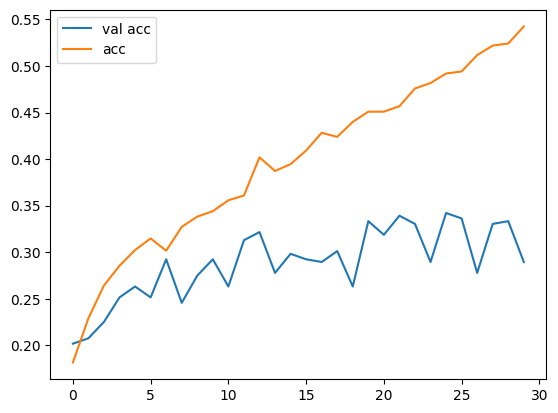

In [53]:
history_obj = history.history 
# test_acc = model.evaluate(X_test, y_test)[1]

test_acc = model.evaluate(X_test, y_test)[1]
test_predictions = model.predict(X_test)

plt.figure()
plt.plot(history_obj["val_accuracy"], label="val acc")
plt.plot(history_obj["accuracy"], label="acc")
plt.legend()
print("Val Accuracy:" , max(history_obj["val_accuracy"]), "Accuracy:", max(history_obj["accuracy"]))
print("Test Accuracy:", test_acc)
plt.show()

In [35]:
np.argmax(test_predictions, axis=1)

array([5, 8, 6, 7, 1, 5, 7, 1, 3, 0, 1, 7, 7, 9, 4, 9, 4, 8, 4, 0, 7, 2,
       7, 9, 7, 5, 9, 1, 1, 8, 1, 4, 4, 4, 0, 1, 8, 7, 9, 6, 7, 7, 7, 9,
       4, 0, 4, 1, 5, 0, 3, 4, 9, 7, 0, 6, 8, 0, 6, 2, 1, 0, 4, 7, 7, 3,
       7, 8, 1, 9, 4, 7, 4, 7, 1, 3, 4, 6, 0, 0, 1, 4, 0, 3, 7, 6, 4, 6,
       6, 0, 9, 1, 2, 7, 4, 5, 7, 9, 4, 3, 1, 8, 6, 6, 3, 1, 2],
      dtype=int64)

In [36]:
np.argmax(y_test, axis=1)

array([2, 4, 4, 7, 9, 9, 7, 1, 3, 8, 1, 3, 6, 5, 3, 5, 3, 3, 1, 0, 7, 4,
       7, 2, 1, 3, 6, 7, 1, 6, 7, 6, 8, 9, 1, 6, 4, 9, 7, 6, 6, 1, 9, 9,
       4, 5, 4, 0, 6, 9, 3, 3, 6, 7, 8, 4, 2, 4, 7, 8, 1, 0, 5, 3, 5, 3,
       7, 3, 8, 7, 0, 7, 6, 7, 0, 9, 8, 5, 5, 2, 7, 0, 2, 0, 0, 3, 3, 9,
       4, 1, 5, 9, 6, 6, 8, 5, 1, 7, 4, 3, 9, 9, 7, 1, 8, 0, 6],
      dtype=int64)

In [37]:
# Minimum Reproducible Variants Models


# Model 1
# Le Net 5 Variant


In [38]:
# Model 2
# Mobile Net Variant 
# https://towardsdatascience.com/building-mobilenet-from-scratch-using-tensorflow-ad009c5dd42c

In [39]:
# Model 3
# Squeeze Net Variant
# https://medium.com/@sumeetbadgujar/squeezenet-implementation-in-tensorflow-7949d795e84e


In [40]:
# Model 4
# Shuffle Net Variant
# https://medium.com/analytics-vidhya/creating-shufflenet-in-tensorflow-f59123bd555b


In [41]:
# Model 6
# ResNet Variant
# https://www.analyticsvidhya.com/blog/2021/08/how-to-code-your-resnet-from-scratch-in-tensorflow/


In [42]:
# Model 7
# Inception Variant
# https://www.analyticsvidhya.com/blog/2018/10/understanding-inception-network-from-scratch/


In [43]:

# Model 5
# DenseNet 
# https://towardsdatascience.com/complete-architectural-details-of-all-efficientnet-models-5fd5b736142
#   
# Tensorflow applications 


In [44]:




# Model 8
# VGG Variant
# https://towardsdatascience.com/creating-vgg-from-scratch-using-tensorflow-a998a5640155